# Core Operations

---

## Basic Operations on Images

### Accessing and Modifying pixel values

In [11]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


stray_image = cv.imread('stray.jpg')

# a single pixel at its [Row, Column] values
px = stray_image[100,100]

#[B G R]
print(px)


[26 34 93]


Can even access single pixel values

In [5]:
#[Row, Column, Color-Channel] BGR 
blue_px= stray_image[100,100,0]
print(blue_px)

# Item is considered better
px_item = stray_image.item(100,100,0)
print(px_item)

26
26


Can modify single pixels as well

In [6]:

stray_image[100,100] = [255,255,255]
print(stray_image[100,100])

[255 255 255]


Total pixels count

In [7]:
print(stray_image.size)

2764800


Image datatype

In [8]:
print(stray_image.dtype)

uint8


In [24]:
height, width, _ = stray_image.shape
print(f"Resolution: {width}x{height}")

Resolution: 1280x720


### Image ROI (Region Of Interest)

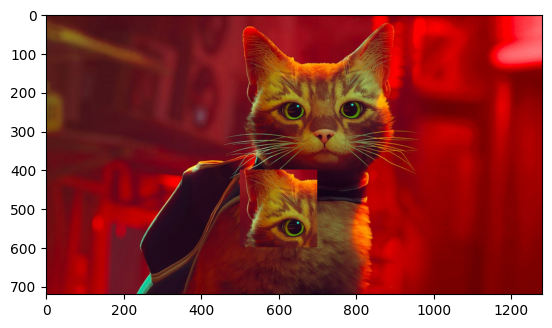

In [26]:
cutout = stray_image[100:300, 500:700]
stray_image[400:600, 500:700, :] = cutout

plt.figure(dpi=100)  # Increase dpi for higher resolution(default=100)
plt.imshow(cv.cvtColor(stray_image, cv.COLOR_BGR2RGB)) # MatPlotLib reads images in RGB so it needs to be converted
plt.show()


### Splitting and merging channels of an image

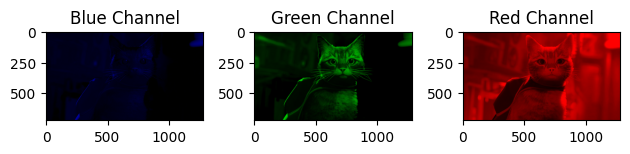

In [59]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


#Load image to use, then split into various color channels
stray_image = cv2.imread('stray.jpg')
b, g, r = cv2.split(stray_image)

blank = np.zeros(stray_image.shape[:2], dtype='uint8')
blue = cv.merge([blank,blank,b])
red = cv.merge([r,blank,blank])
green = cv.merge([blank,g,blank])



# Create a figure with multiple subplots
fig, axs = plt.subplots(1, 3, dpi=100)

# Display the blue channel in the first subplot
axs[0].imshow(blue)
axs[0].set_title('Blue Channel')

# Display the green channel in the second subplot
axs[1].imshow(green)
axs[1].set_title('Green Channel')

# Display the red channel in the third subplot
axs[2].imshow(red)
axs[2].set_title('Red Channel')

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure with subplots
plt.show()


### Making Borders with padding

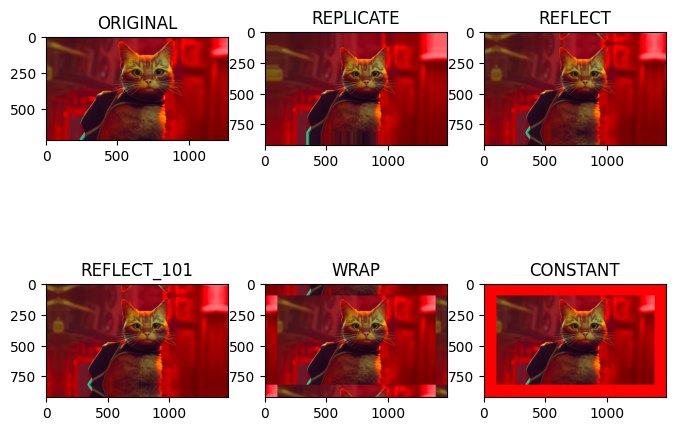

In [68]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


BLUE = [255,0,0]
img1 = cv.imread('stray.jpg')
b, g, r = cv2.split(img1)
img1 = cv.merge((r,g,b))

#ARGS = IMG, Top, Bottom, Left, Right, Border Type
replicate = cv.copyMakeBorder(img1,100,100,100,100,cv.BORDER_REPLICATE)
reflect = cv.copyMakeBorder(img1,100,100,100,100,cv.BORDER_REFLECT)
reflect101 = cv.copyMakeBorder(img1,100,100,100,100,cv.BORDER_REFLECT_101)
wrap = cv.copyMakeBorder(img1,100,100,100,100,cv.BORDER_WRAP)
constant= cv.copyMakeBorder(img1,100,100,100,100,cv.BORDER_CONSTANT,value=BLUE)

plt.figure(figsize=(8, 6))
plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.show()

## Arithmetic Operations on Images

### Image addition

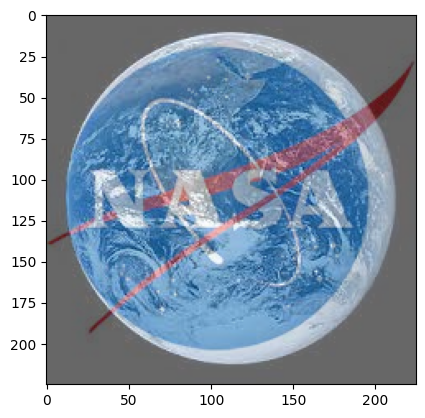

In [6]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

nasa_img = cv.imread('nasa.jpg')
world_img = cv.imread('world.jpg')

dst = cv.addWeighted(nasa_img,0.4,world_img,0.6,0)

plt.figure(dpi=100)  # Increase dpi for higher resolution(default=100)
plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB)) # MatPlotLib reads images in RGB so it needs to be converted
plt.show()